In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.5
#mpl.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})


In [3]:
# Make gaussian mixture data

/tmp/ipykernel_625565/3260039714.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


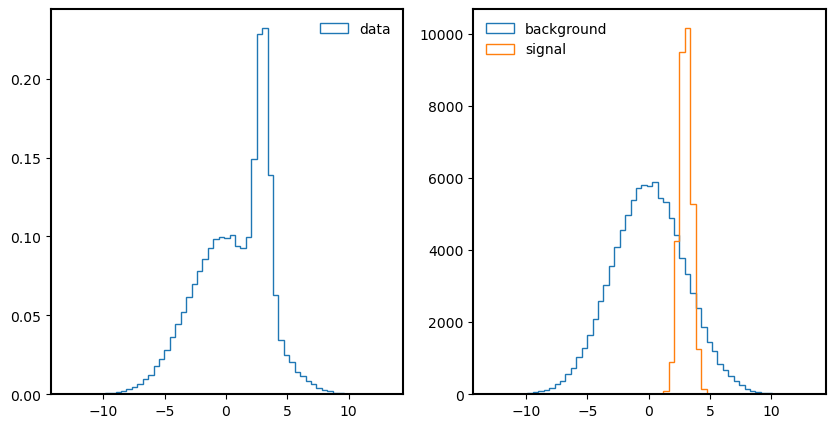

In [5]:
split = ['train','val']


n_back = 100000

back_mean = 0
sig_mean = 3

for data in split:
    background = np.random.normal(back_mean, 3, n_back)

    significance = 100
    n_signal = int(np.sqrt(n_back) * significance)

    #n_signal = n_back

    signal = np.random.normal(sig_mean, 0.5, n_signal)
    x = np.concatenate([background, signal])

    bins = np.linspace(min(x.flatten()), max(x.flatten()), 60)

    plt.subplots(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(x.flatten(), bins=bins, density=True, histtype='step', label='data')
    plt.legend(frameon=False)

    plt.subplot(1, 2, 2)
    plt.hist(background, bins=bins, density=False, histtype='step', label='background')
    plt.hist(signal, bins=bins, density=False, histtype='step', label='signal')
    plt.legend(frameon=False)
    plt.show()

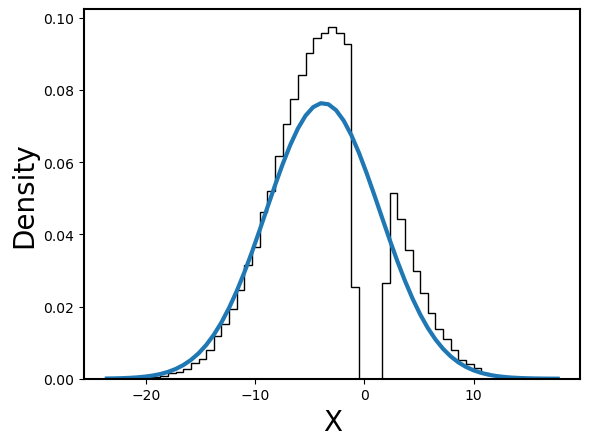

In [3]:
# first of all, let's confirm the optimal number of components

x_sb = x[(x<-1) | (x>2)].reshape(-1, 1)

# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 1

bins = np.linspace(min(x_sb.flatten()), max(x_sb.flatten()), 60)

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x_sb).means_  
covs  = gmm.fit(x_sb).covariances_
weights = gmm.fit(x_sb).weights_

# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
#y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

# Plot 2
plt.hist(x_sb, density=True, color='black', bins=bins, histtype='step', label='data')
plt.plot(x_axis, y_axis0, lw=3, c='C0')
#plt.plot(x_axis, y_axis1, lw=3, c='C1')
#plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)


plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')

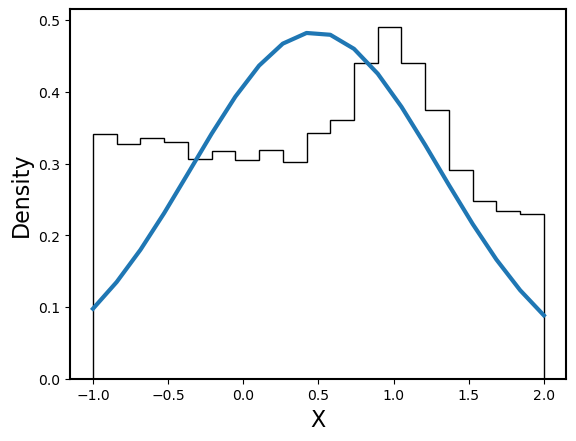

In [8]:
# first of all, let's confirm the optimal number of components

x_sr = x[(x>-1) & (x<2)].reshape(-1, 1)

bins = np.linspace(min(x_sr.flatten()), max(x_sr.flatten()), 20)

# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 1

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x_sr).means_  
covs  = gmm.fit(x_sr).covariances_
weights = gmm.fit(x_sr).weights_

# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
#y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

# Plot 2
plt.hist(x_sr, density=True, color='black', bins=bins,histtype='step')
plt.plot(x_axis, y_axis0, lw=3, c='C0')
#plt.plot(x_axis, y_axis1, lw=3, c='C1')
#plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=16)
plt.ylabel(r"Density", fontsize=16)

plt.subplots_adjust(wspace=0.3)
plt.show()
plt.close('all')

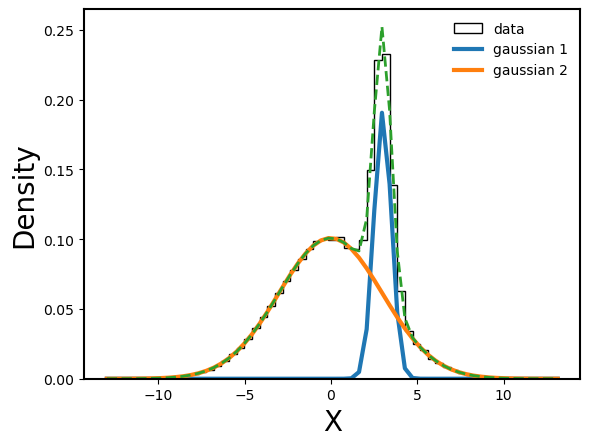

In [10]:
# first of all, let's confirm the optimal number of components

x_all = x.reshape(-1, 1)

bins = np.linspace(min(x_all.flatten()), max(x_all.flatten()), 60)
# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 2

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full', tol=1e-18)

# find useful parameters
mean = gmm.fit(x_all).means_  
covs  = gmm.fit(x_all).covariances_
weights = gmm.fit(x_all).weights_

# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

# Plot 2
plt.hist(x_all, density=True, color='black', bins=bins, histtype='step',
         label='data')
plt.plot(x_axis, y_axis0, lw=3, c='C0', label='gaussian 1')
plt.plot(x_axis, y_axis1, lw=3, c='C1', label = 'gaussian 2')
plt.plot(x_axis, y_axis0+y_axis1, lw=2, c='C2', ls='dashed')
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.legend(frameon=False)
plt.show()
plt.close('all')

#mu_background = float(mean[0][0])
#sigma_background = float(covs[0][0][0])

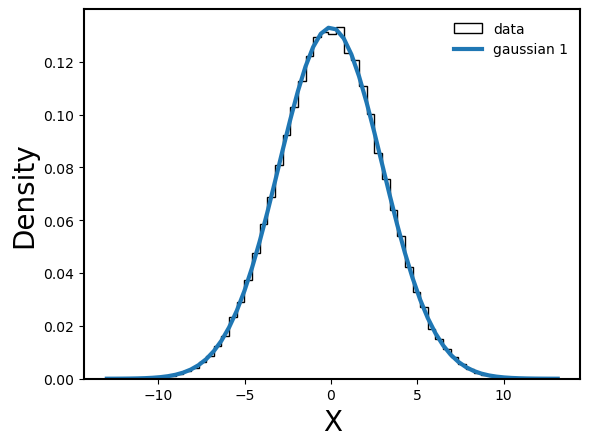

In [11]:
# first of all, let's confirm the optimal number of components

x_all = background.reshape(-1, 1)

bins = np.linspace(min(x_all.flatten()), max(x_all.flatten()), 60)
# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 1

# create GMM model object
gmm = GMM(n_components = n_optimal, max_iter=1000, random_state=10, covariance_type = 'full')

# find useful parameters
mean = gmm.fit(x_all).means_  
covs  = gmm.fit(x_all).covariances_
weights = gmm.fit(x_all).weights_

# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
#y_axis1 = norm.pdf(x_axis, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

# Plot 2
plt.hist(x_all, density=True, color='black', bins=bins, histtype='step',
         label='data')
plt.plot(x_axis, y_axis0, lw=3, c='C0', label='gaussian 1')
#plt.plot(x_axis, y_axis1, lw=3, c='C1', label = 'gaussian 2')
#plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C2', ls='dashed')
#plt.ylim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)

plt.subplots_adjust(wspace=0.3)
plt.legend(frameon=False)
plt.show()
plt.close('all')

mu_background = float(mean[0][0])
sigma_background = float(covs[0][0][0])

# Custom EM algorithm for Gaussian Mixture Models

In [123]:

def EM_with_background(x, n_components, max_iter, tol, mu_b, sigma_b):
    # initialize parameters
    n = len(x)
    mu_s = np.random.uniform(min(x), max(x), 1)
    sigma_s = np.random.uniform(min(x), max(x), 1)
    w = [0.01,0.99]

    mu = [mu_s , mu_b]
    sigma = [sigma_s , sigma_b]
    

    likelihood_arr = []
    mu_arr = []
    sigma_arr = []
    w_arr = []

    # initialize log likelihood
    log_likelihood = 0
    
    # initialize weights
    gamma = np.zeros((n, n_components))

    # fix background
    gamma[:, 1] = w[1] * norm.pdf(x, mu[1], np.sqrt(sigma[1]))

    
    # initialize iteration
    iteration = 0
    
    # EM algorithm
    while True:
        # E-step
        # Find posterior probability of signal
        gamma[:, 0] = w[0] * norm.pdf(x, mu[0], np.sqrt(sigma[0])) + \
        w[1] * norm.pdf(x, mu[1], np.sqrt(sigma[1]))       
        gamma = gamma / gamma.sum(axis=1).reshape(-1, 1)
        
        # M-step
        mu[0] = (np.sum(gamma * x.reshape(-1, 1), axis=0) / np.sum(gamma, axis=0))[0]
        sigma[0] = (np.sum(gamma * (x.reshape(-1, 1) - mu)**2, axis=0) / np.sum(gamma, axis=0))[0]
        w = np.sum(gamma, axis=0) / n
        
        # calculate log likelihood
        log_likelihood_new = np.sum(np.log(np.sum(gamma, axis=1)))
        likelihood_arr.append(log_likelihood_new)
        mu_arr.append(mu)
        sigma_arr.append(sigma)
        w_arr.append(w)

     #   print('Iteration {}: log likelihood = {}'.format(iteration, log_likelihood_new))
        
        # check convergence
        if np.abs(log_likelihood_new - log_likelihood) < tol:
            print('Converged at iteration {}'.format(iteration))
            break
        else:
            log_likelihood = log_likelihood_new
            iteration += 1
            if iteration > max_iter:
                break
    
    return np.array(mu_arr), \
np.array(sigma_arr),np.array(w_arr), gamma, np.array(likelihood_arr)

    

        
            


In [124]:
x_sr = x[(x>0) & (x<2)]

bins = np.linspace(min(x_sr.flatten()), max(x_sr.flatten()), 20)

# Since the optimal value is n=2 according to both BIC and AIC, let's write down:
n_optimal = 2

mu_a , sigma_a, w_a, _, like_arr = EM_with_background(x_sr, n_optimal, 500, 0,
                                                      mu_background, sigma_background)






-1


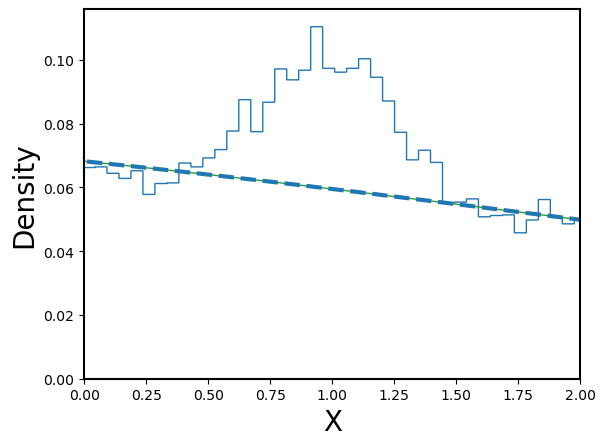

In [127]:
#lowest_likelihood = np.argmin(like_arr)
lowest_likelihood = -1
mu_ = mu_a[lowest_likelihood]
sigma_ = sigma_a[lowest_likelihood]
w_ = w_a[lowest_likelihood]

bins = np.linspace(min(x_all.flatten()), max(x_all.flatten()), 1000)
print(lowest_likelihood)
# create necessary things to plot
x_axis = bins
y_axis0 = norm.pdf(x_axis, float(mu_[0]), np.sqrt(float(sigma_[0])))*w_[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(mu_[1]), np.sqrt(float(sigma_[1])))*w_[1] # 2nd gaussian

# Plot 2
plt.hist(x_all, density=True, histtype='step', bins=bins)
plt.plot(x_axis, y_axis0, lw=1, c='C1')
plt.plot(x_axis, y_axis1, lw=1, c='C2')
plt.plot(x_axis, y_axis0+y_axis1, lw=3, c='C0', ls='dashed')
plt.xlim(0.0, 2.0)
plt.xlabel(r"X", fontsize=20)
plt.ylabel(r"Density", fontsize=20)
plt.show()

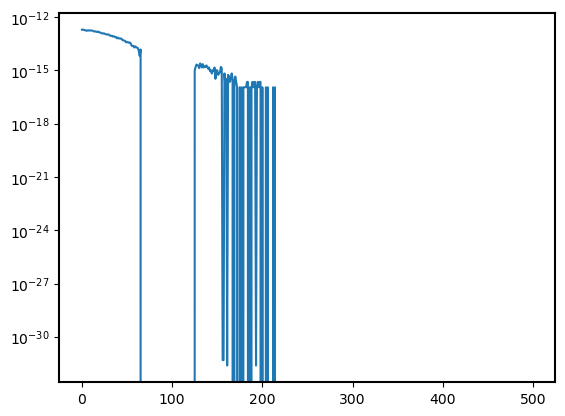